# **JUNAID FAISAL - F2022393016**

# Data Science QUESTION 2

  
You'll be asked to do some analysis and modeling tasks on a dataset created.  
The dataset concerns a video gaming company that has information on its customers and would like to gain more insights on what drives their customers to play for longer hours.  

The following tables are provided:

In [108]:
df_districts_house_prices = pd.read_csv("/content/df_districts_house_prices.csv")
df_person_data = pd.read_csv("/content/df_person_data.csv")
df_person_district = pd.read_csv("/content/df_person_district.csv")

df_person_district

includes information about each customer (person) and the district they live in

- person_id: the person id
- district: the name of the district

In [109]:
df_person_district

,person_id,district
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,Metdunstone
1,16f3bafb-9556-434e-adab-cb02f41fe32a,Tashnerspool
2,0fa17eee-7214-4609-97fe-dd3093601800,Tashnerspool
3,8db4ca66-dfb2-43f2-9c22-aa861dd0d218,Ulven
4,51fed64a-375e-417f-94e4-4d27c368ea44,Red Onvey
...,...,...
69995,8cbea1e2-3257-4db5-ae59-84faa48cfde2,Bluffssel
69996,e099ace5-a760-4362-a9ea-ae8cee590b86,Highnantmar
69997,e9b0604e-ec84-4704-8e75-eabfd59ac4fb,Tashnerspool
69998,e20f8ec5-0ddf-4674-ac1f-d6280b6640ab,Highnantmar


df_districts_house_prices

includes information about each district and the prices of the houses in the district

- district: the name of the district
- house_price: the price of the house
- house_number: the house number in the district

In [110]:
df_districts_house_prices

,district,house_price,house_number
0,Celowsgan,160652.0,1
1,Celowsgan,159219.0,2
2,Celowsgan,161543.0,3
3,Celowsgan,158944.0,4
4,Celowsgan,164121.0,5
...,...,...,...
1358,El Willong,932441.0,30
1359,El Willong,890190.0,31
1360,El Willong,892096.0,32
1361,El Willong,935117.0,33


df_person_data

includes personal information about each of the customers and relevant information to their video gaming habits

- person_id: identifier for a person
- age: the age of the person
- n_kids: the number of kids this person has
- n_vg: the number of video games the person owns
- n_con: the number of video game consols the person owns
- n_presub: the number of premium subscription the person owns
- n_hours_playing: the total number of hours this person play per month 

In [111]:
df_person_data

,person_id,age,n_kids,n_vg,n_con,n_presub,n_hours_playing
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,14.0,0,0,0,0,18.422745
1,16f3bafb-9556-434e-adab-cb02f41fe32a,18.0,0,2,0,0,20.693273
2,0fa17eee-7214-4609-97fe-dd3093601800,28.0,0,3,0,0,22.412490
3,8db4ca66-dfb2-43f2-9c22-aa861dd0d218,20.0,1,72,0,0,299.187025
4,51fed64a-375e-417f-94e4-4d27c368ea44,32.0,1,58,1,3,20.367141
...,...,...,...,...,...,...,...
69995,8cbea1e2-3257-4db5-ae59-84faa48cfde2,32.0,4,62,1,2,21.378288
69996,e099ace5-a760-4362-a9ea-ae8cee590b86,36.0,0,53,1,1,3.707476
69997,e9b0604e-ec84-4704-8e75-eabfd59ac4fb,19.0,0,1,1,0,23.809075
69998,e20f8ec5-0ddf-4674-ac1f-d6280b6640ab,31.0,2,49,3,2,15.708397


## Quick EDA

The goals of these questions is to evaluate your plotting, data mangling, and plot interpretation skills.   
Use whatever libraries you are comfortable with.   
Code clarity and cleanliness are also highly valuable.   

In [112]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import squarify
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
import lightgbm as lgbm
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from yellowbrick.classifier import DiscriminationThreshold
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

### 1. Plot each district's house prices distribution with marking the mean by a vertical line


In [114]:
group_district=  df_districts_house_prices.groupby(['district','house_price']).mean()
group_district

house_number
district  house_price              
Bluffssel 169287.0              7.0
          180790.0             13.0
          181911.0             34.0
          184362.0             21.0
          185752.0             42.0
...                             ...
Wkentown  721725.0             33.0
          724712.0             12.0
          731347.0              1.0
          733969.0              6.0
          800445.0              2.0

[1351 rows x 1 columns]

<ipython-input-115-db3695394cfb>:6: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



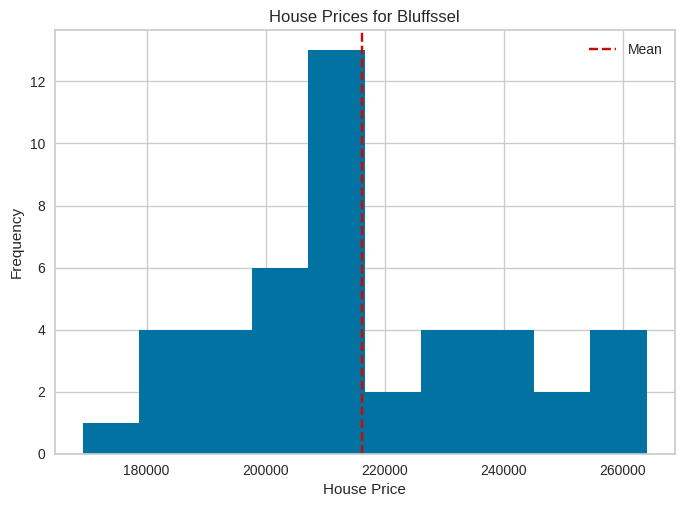

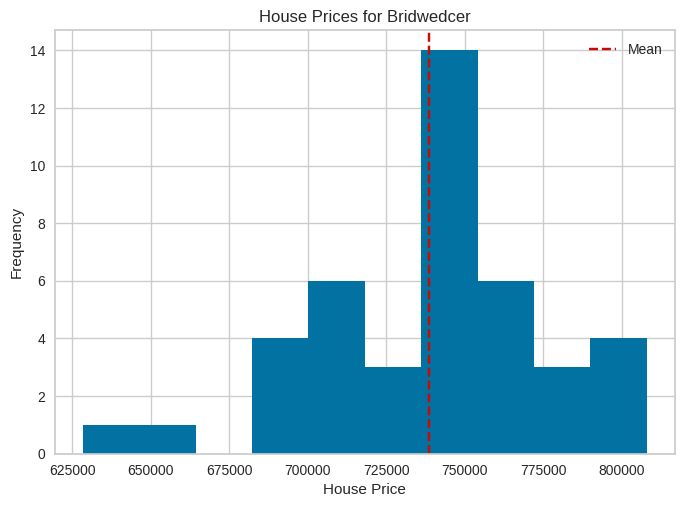

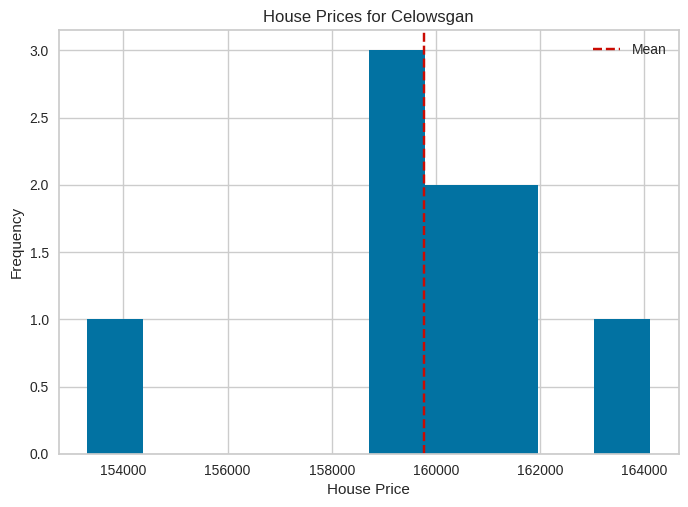

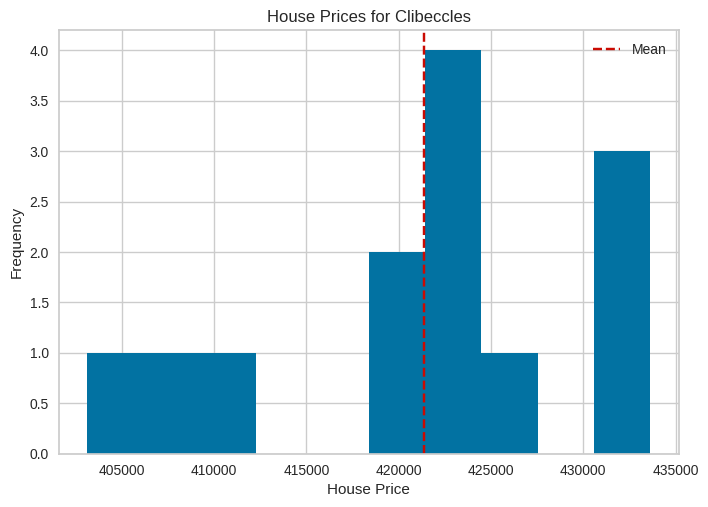

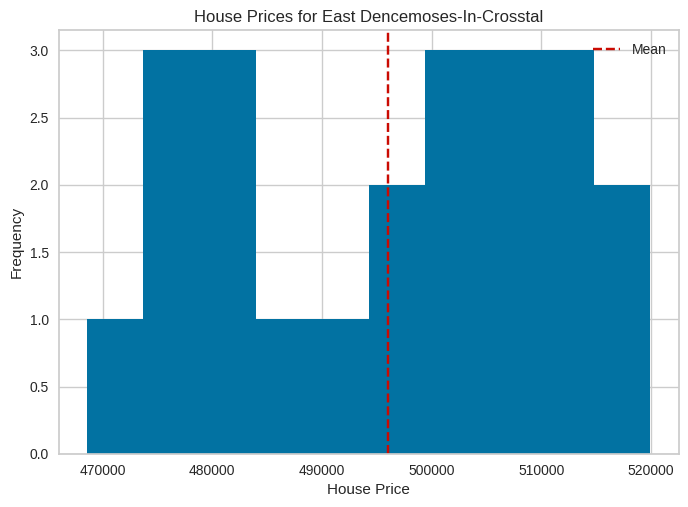

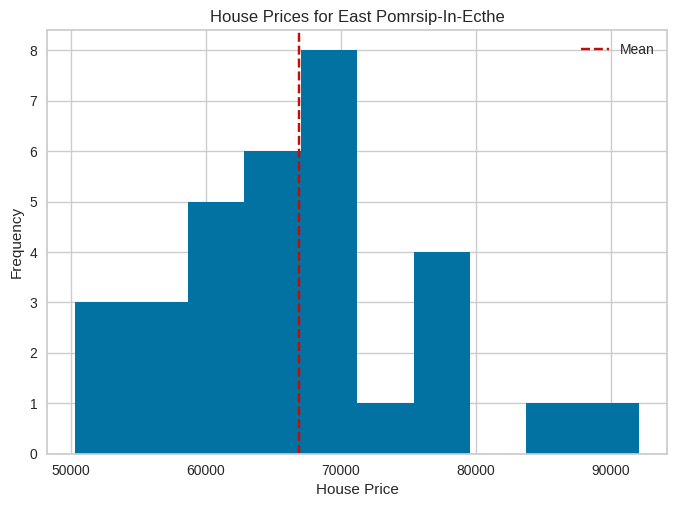

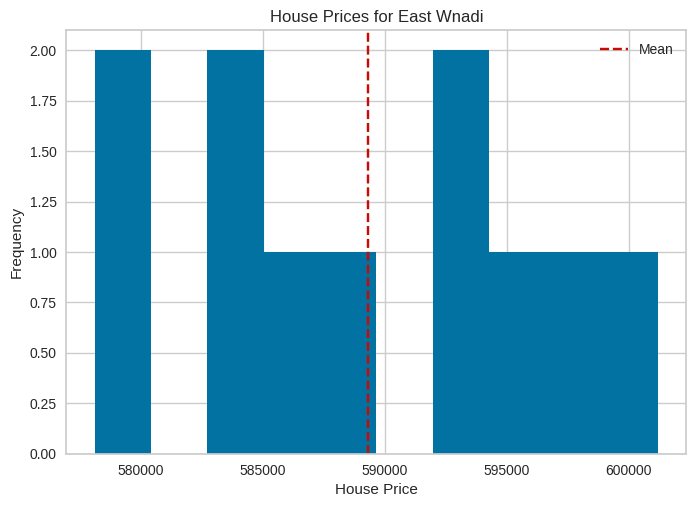

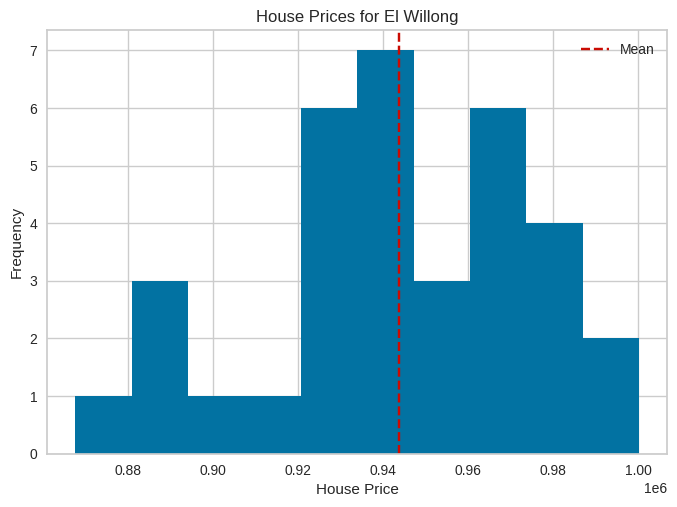

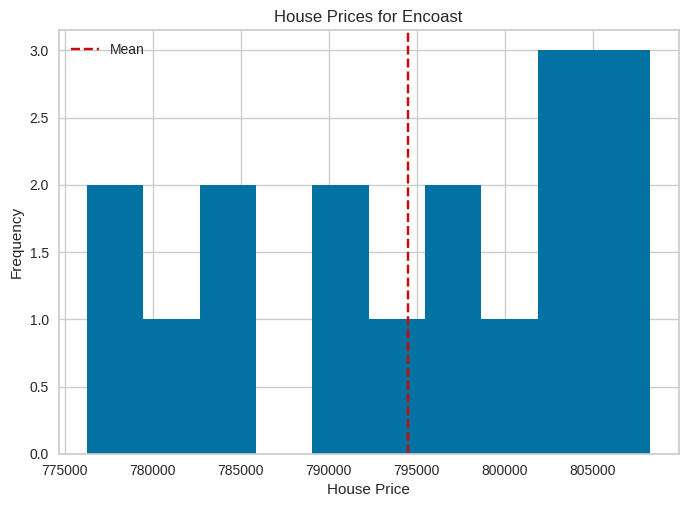

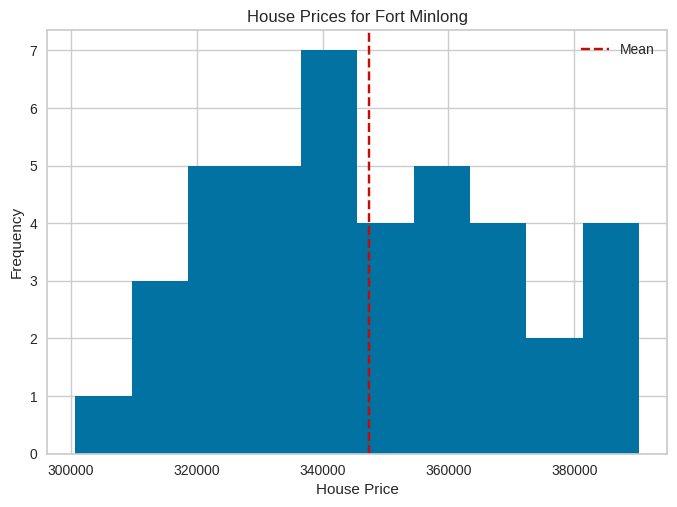

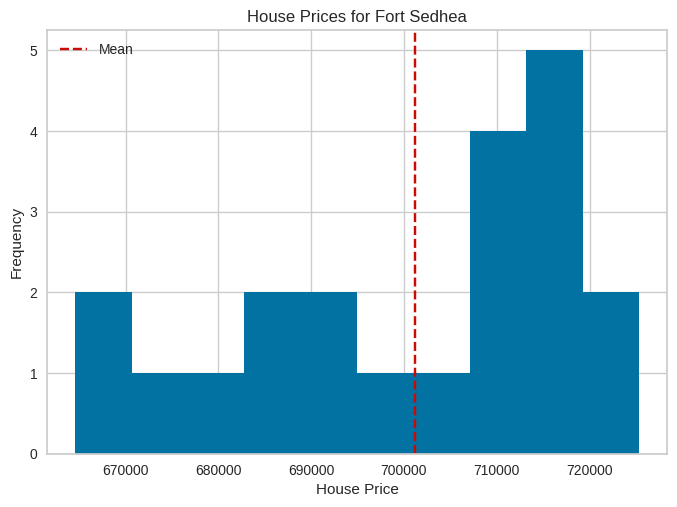

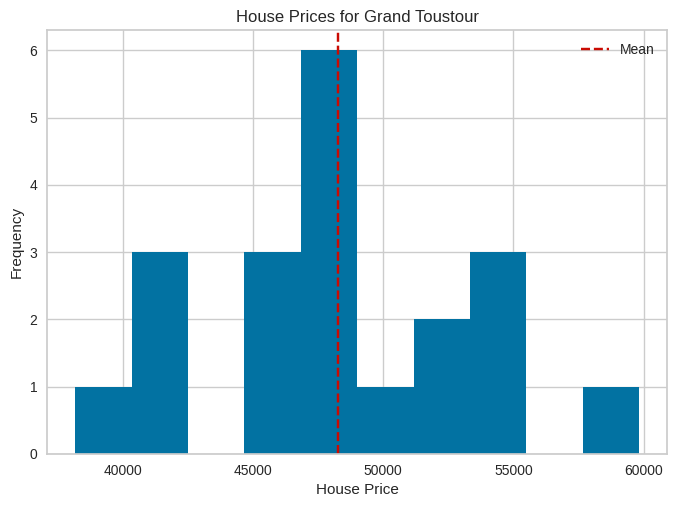

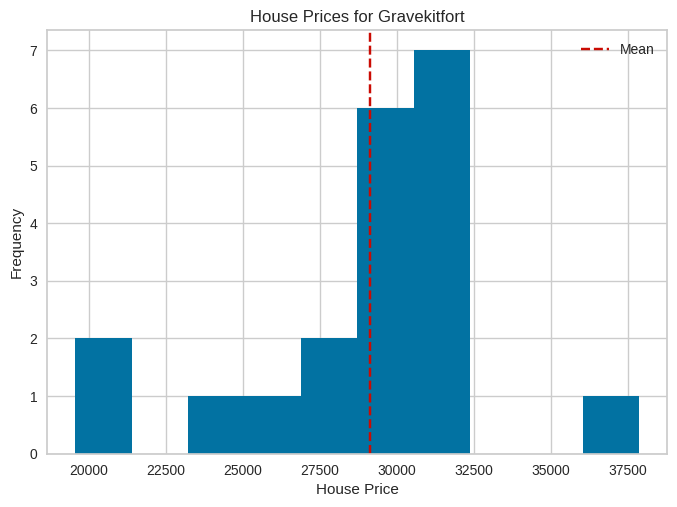

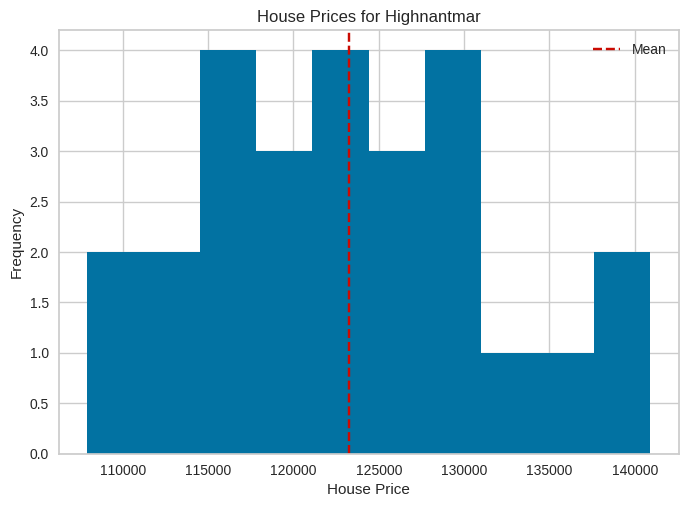

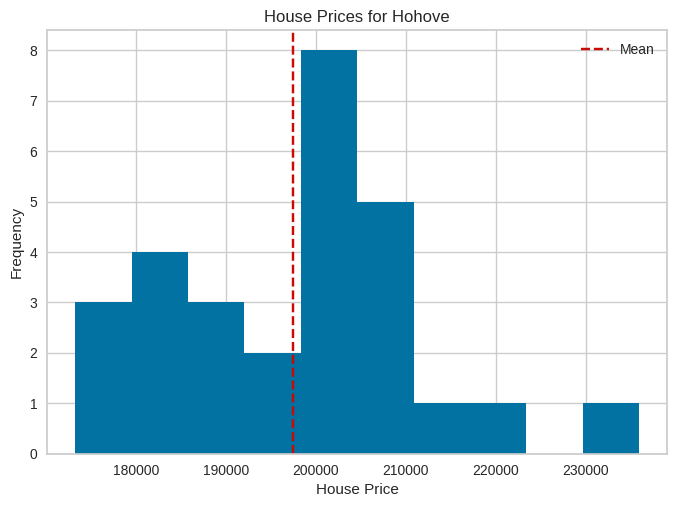

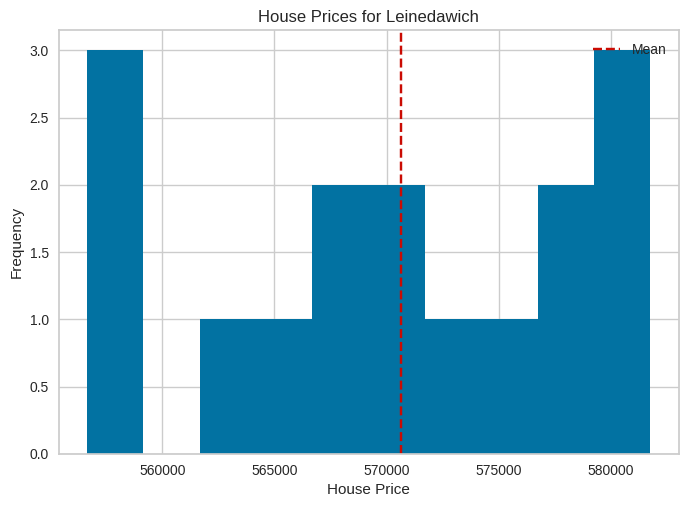

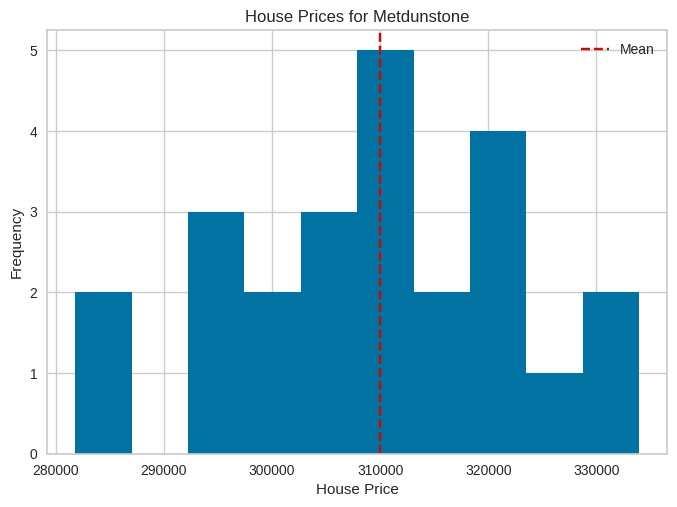

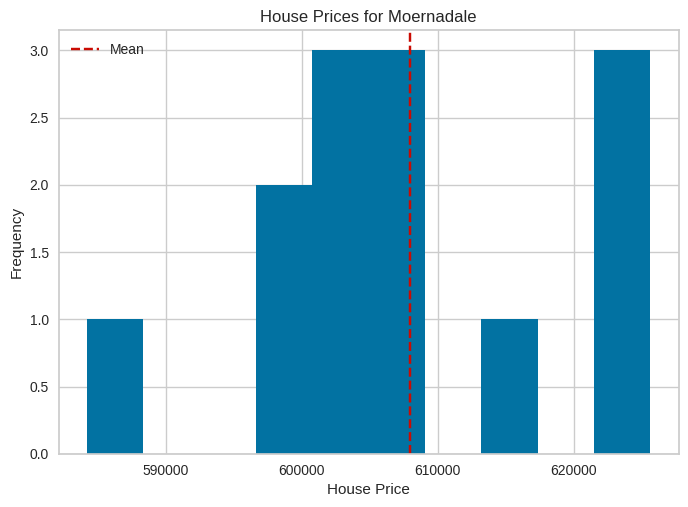

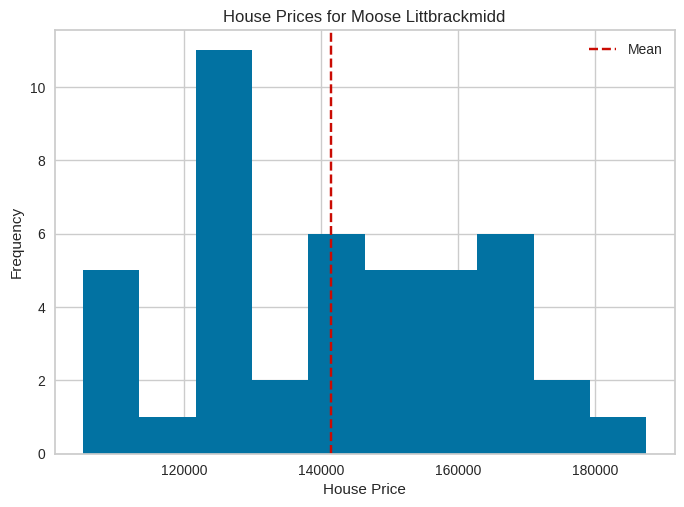

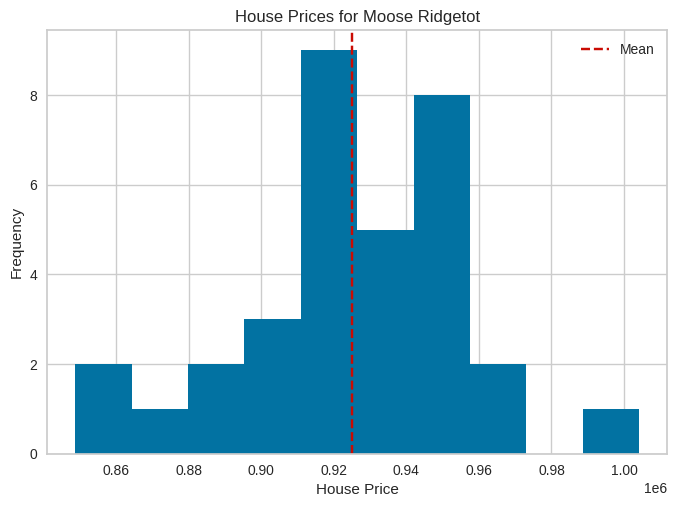

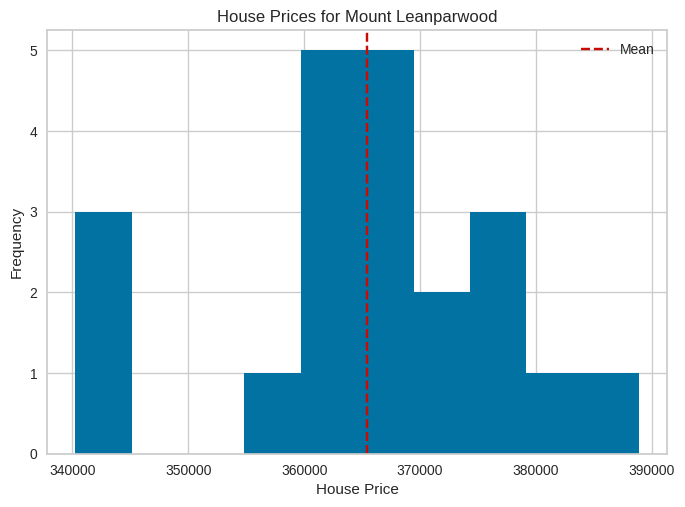

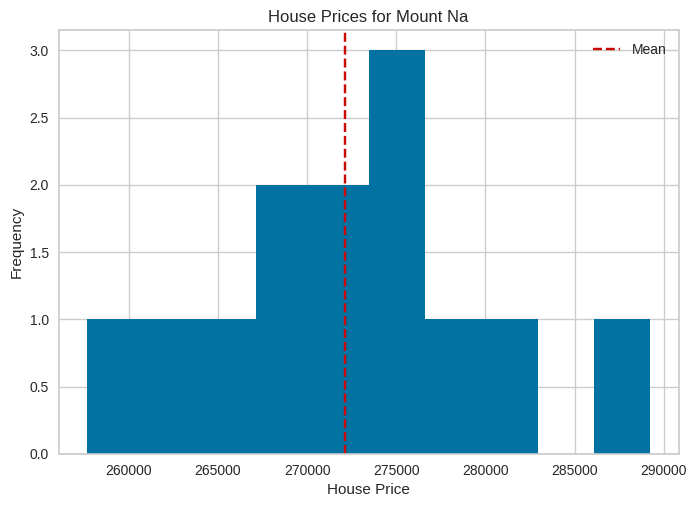

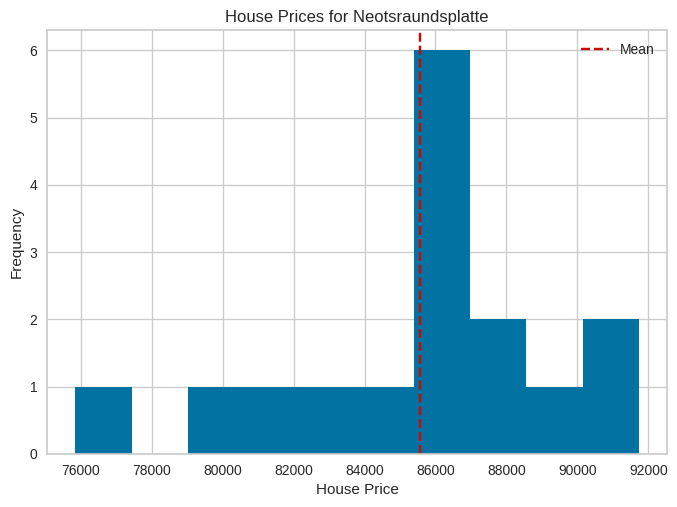

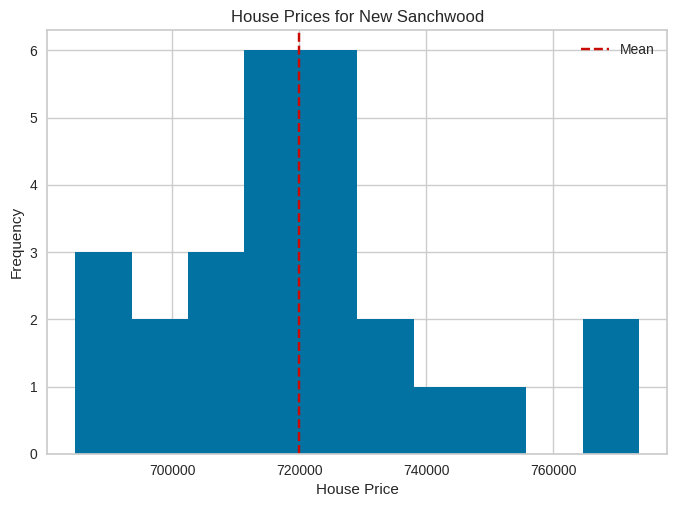

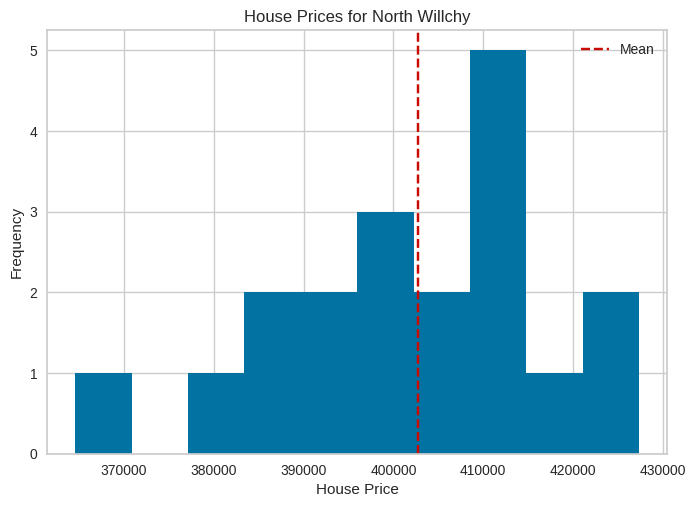

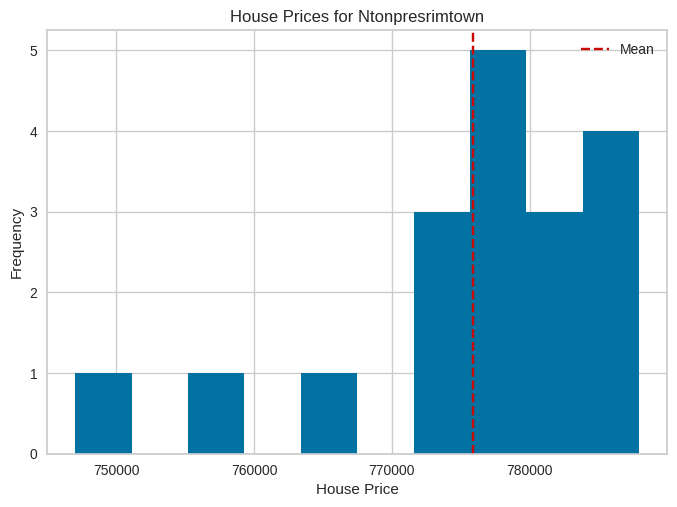

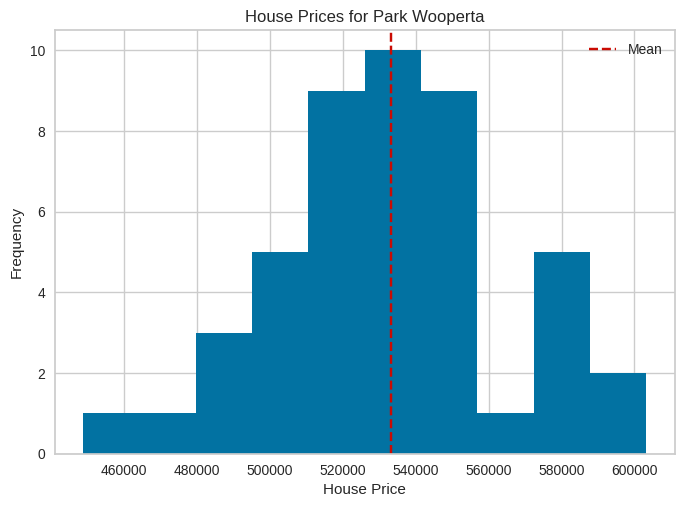

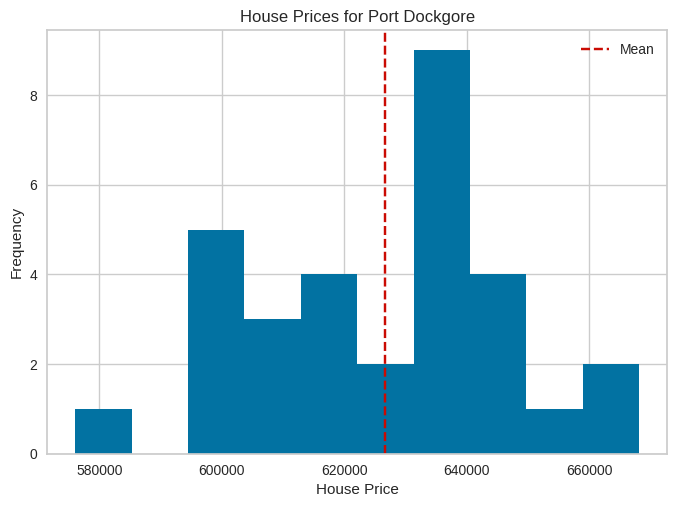

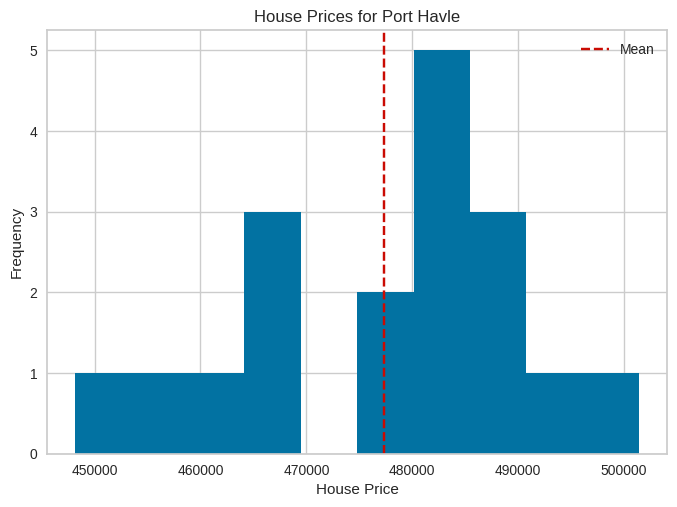

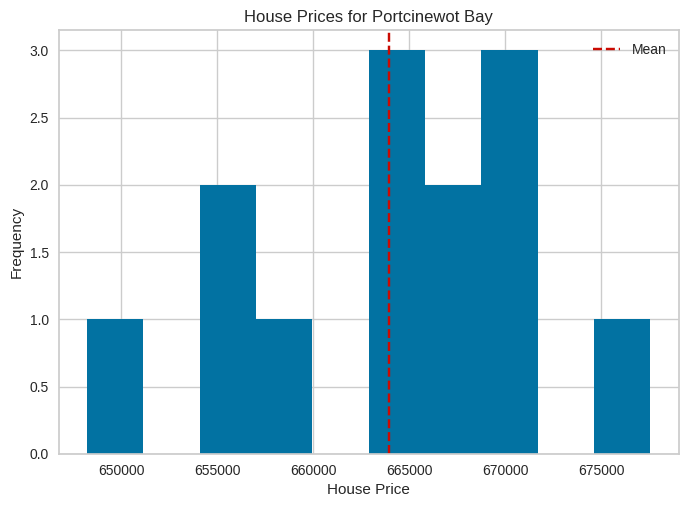

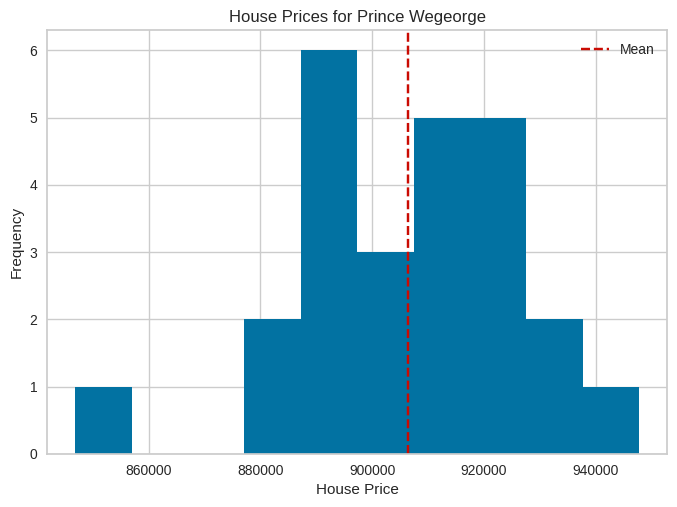

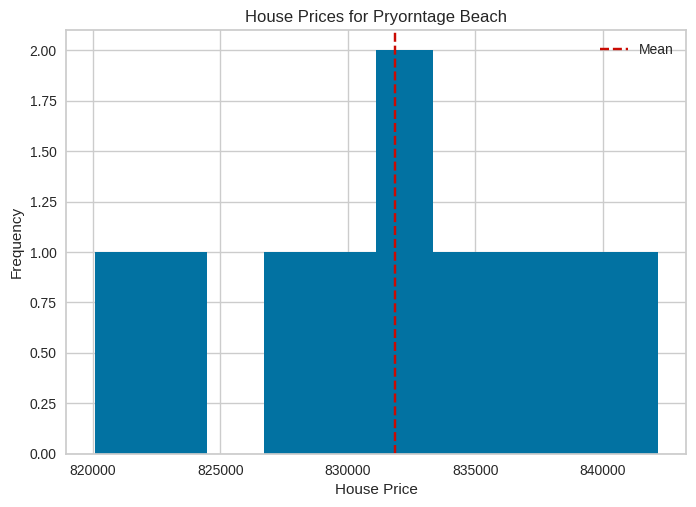

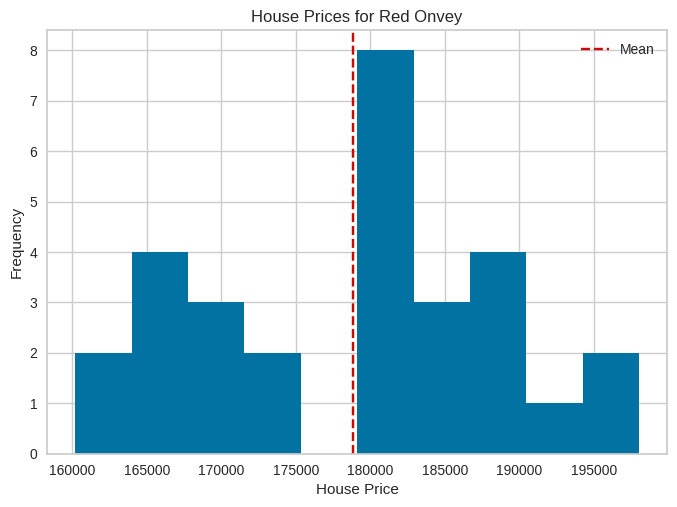

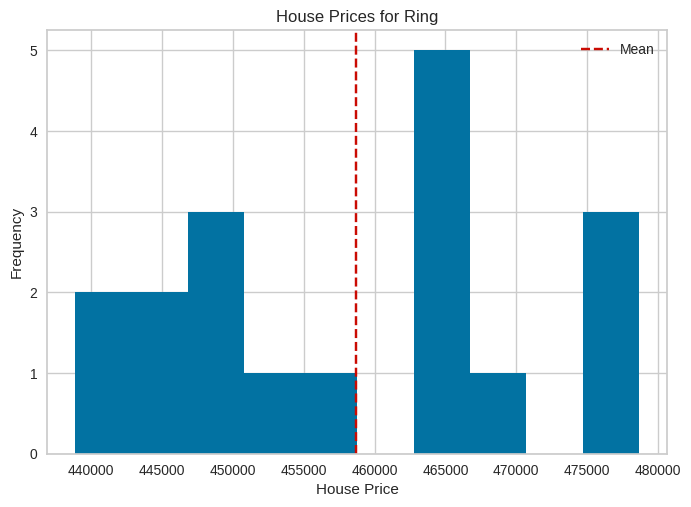

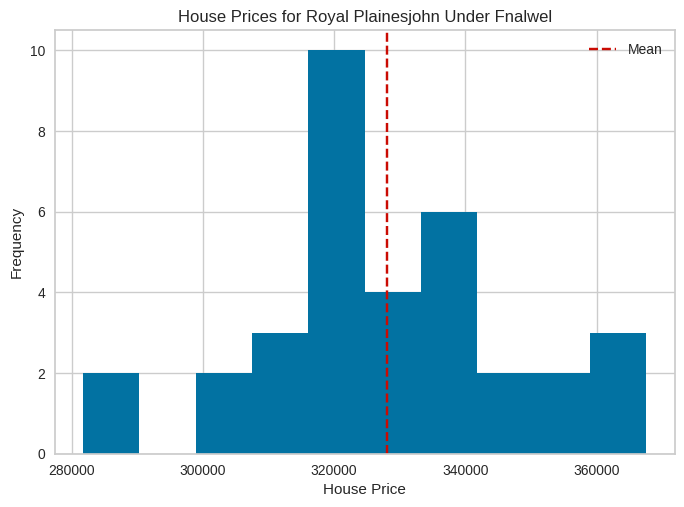

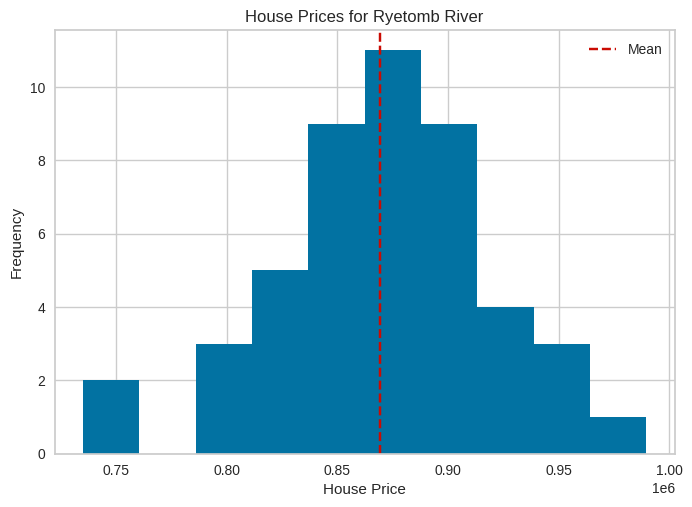

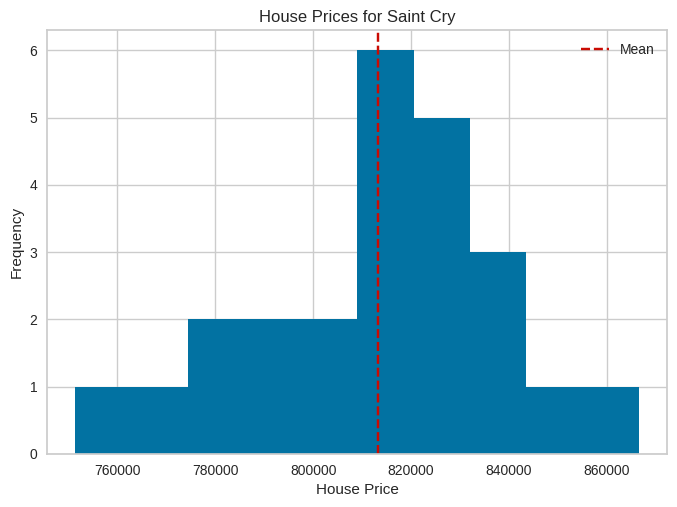

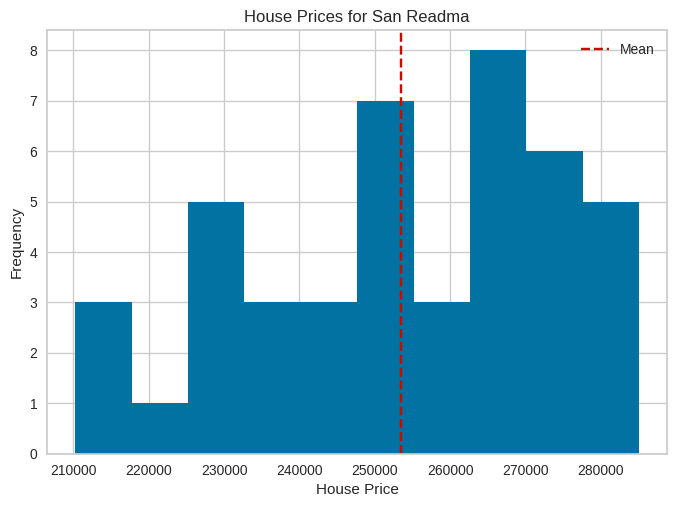

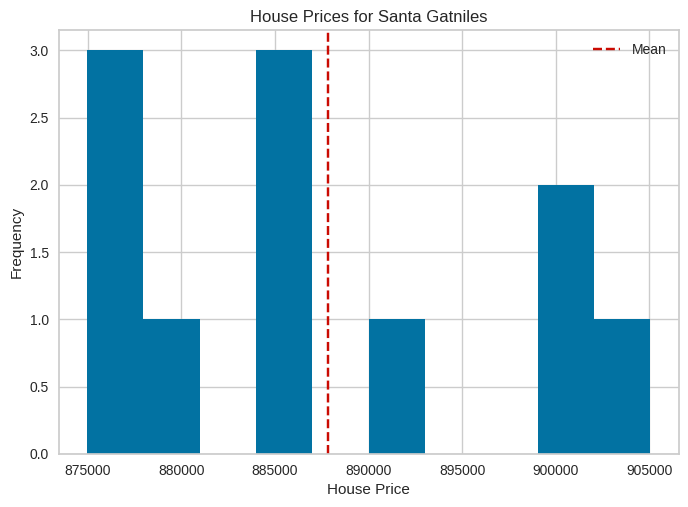

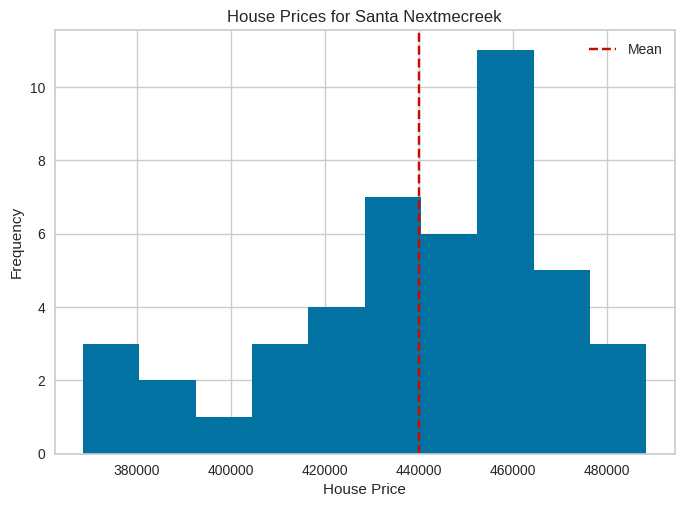

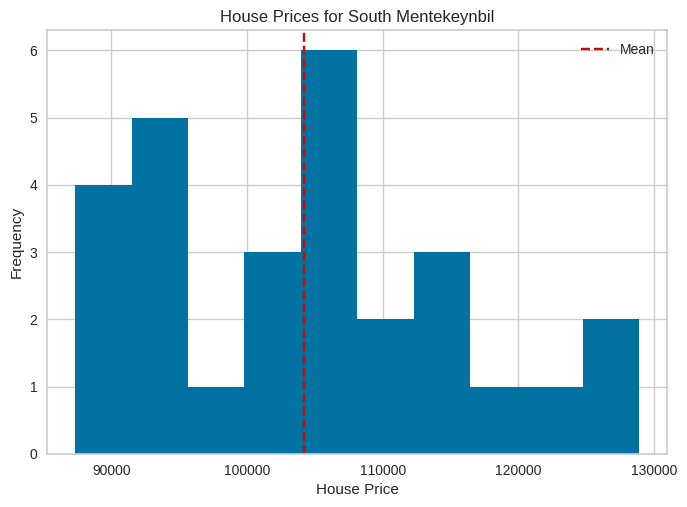

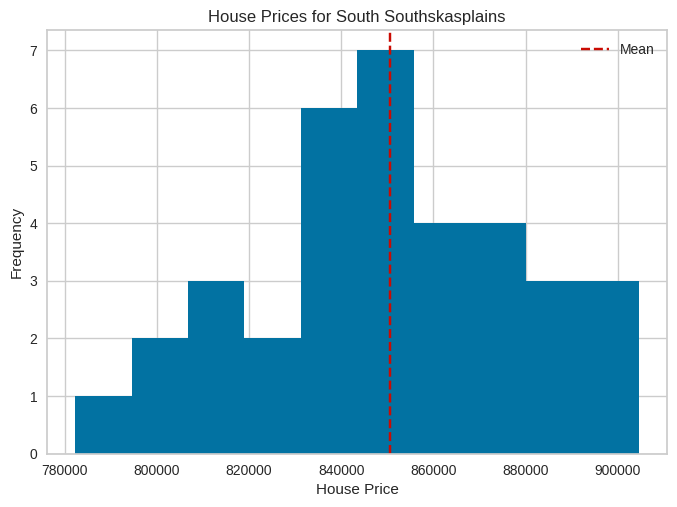

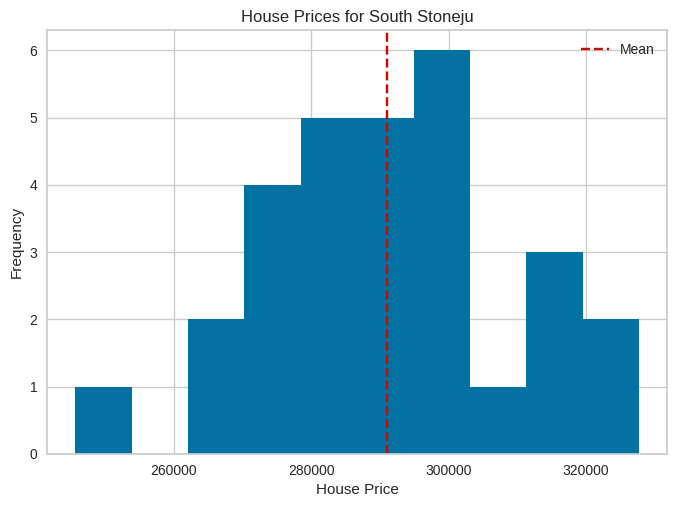

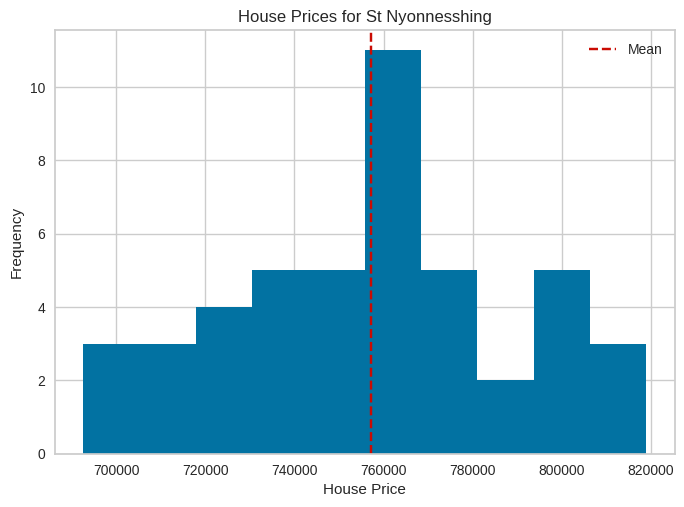

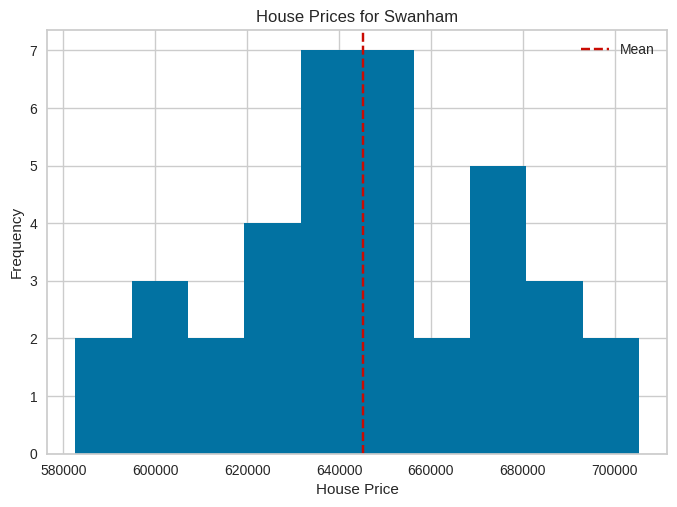

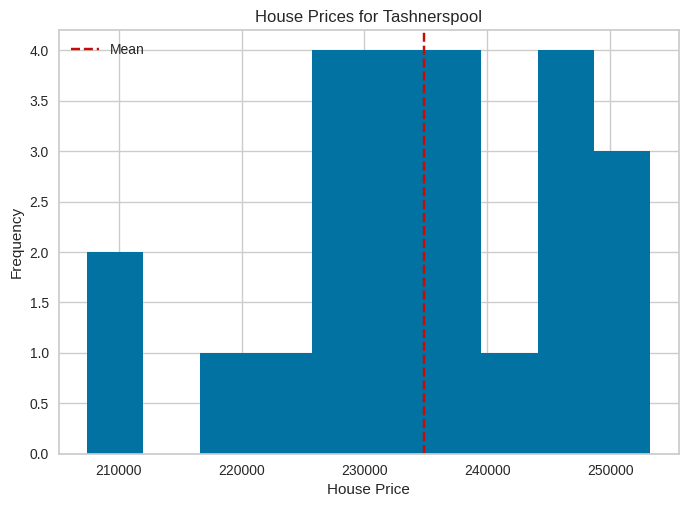

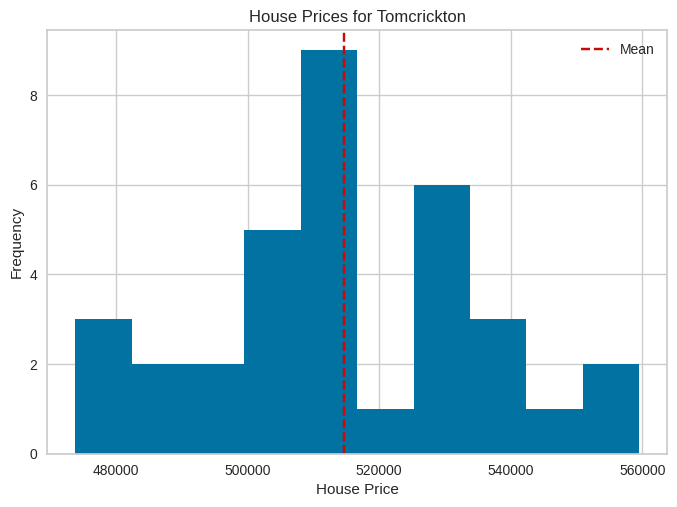

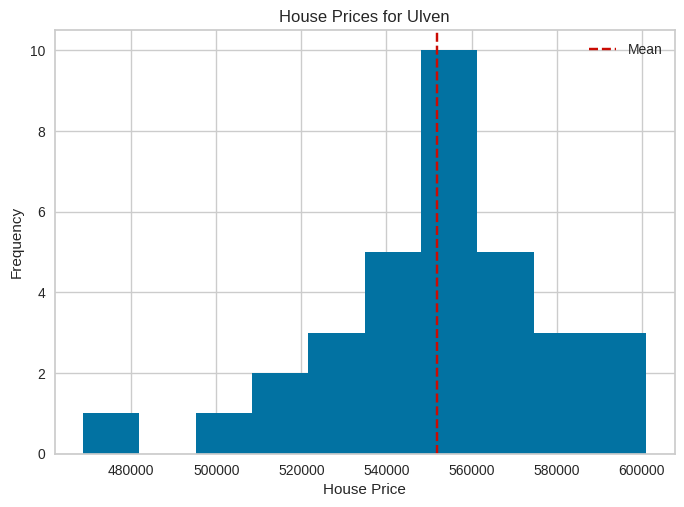

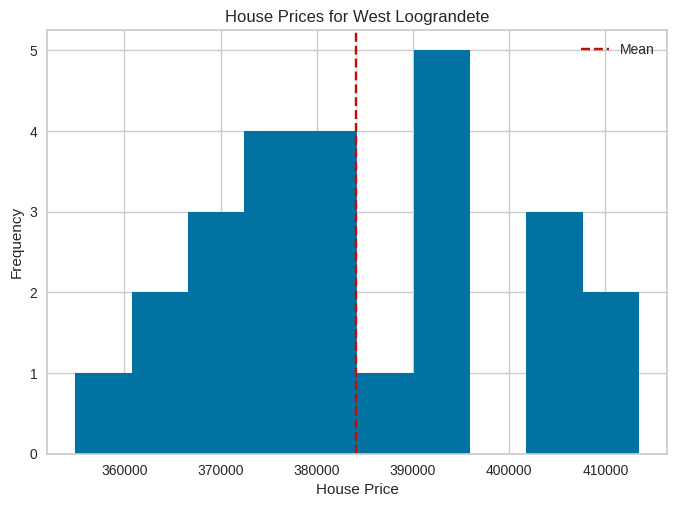

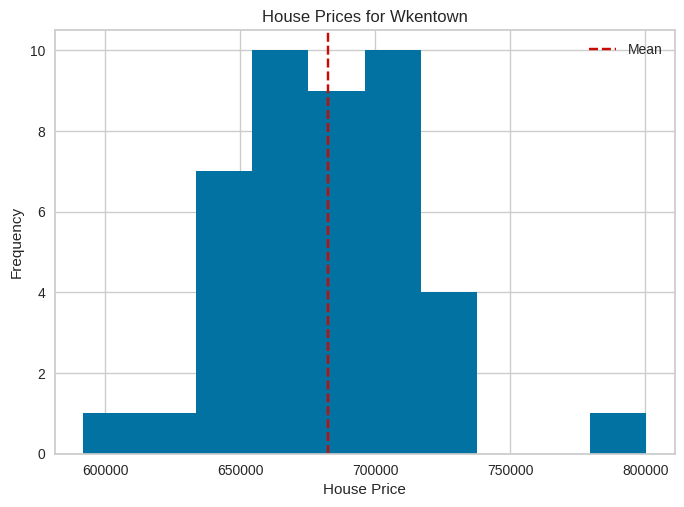

In [115]:
import matplotlib.pyplot as plt

for district, data in group_district.groupby('district'):
    plt.figure()
    house_prices = data.index.get_level_values('house_price').values
    mean_price = house_prices.mean()
    plt.hist(house_prices)
    plt.axvline(mean_price, color='r', linestyle='--', label='Mean')
    plt.xlabel('House Price')
    plt.ylabel('Frequency')
    plt.title('House Prices for {}'.format(district))
    plt.legend()
plt.show()

### 2. Combine all of the three data sources into one table to use in further analysis. 

In [116]:


out = df_person_data.merge(df_person_district[["person_id","district"]],
                   on="person_id", how="left") 

out

,person_id,age,n_kids,n_vg,n_con,n_presub,n_hours_playing,district
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,14.0,0,0,0,0,18.422745,Metdunstone
1,16f3bafb-9556-434e-adab-cb02f41fe32a,18.0,0,2,0,0,20.693273,Tashnerspool
2,0fa17eee-7214-4609-97fe-dd3093601800,28.0,0,3,0,0,22.412490,Tashnerspool
3,8db4ca66-dfb2-43f2-9c22-aa861dd0d218,20.0,1,72,0,0,299.187025,Ulven
4,51fed64a-375e-417f-94e4-4d27c368ea44,32.0,1,58,1,3,20.367141,Red Onvey
...,...,...,...,...,...,...,...,...
69995,8cbea1e2-3257-4db5-ae59-84faa48cfde2,32.0,4,62,1,2,21.378288,Bluffssel
69996,e099ace5-a760-4362-a9ea-ae8cee590b86,36.0,0,53,1,1,3.707476,Highnantmar
69997,e9b0604e-ec84-4704-8e75-eabfd59ac4fb,19.0,0,1,1,0,23.809075,Tashnerspool
69998,e20f8ec5-0ddf-4674-ac1f-d6280b6640ab,31.0,2,49,3,2,15.708397,Highnantmar


In [117]:

out_out = out.merge(df_districts_house_prices[["district","house_price","house_number"]],
                   on="district", how="left")
	
out_out  

,person_id,age,n_kids,n_vg,n_con,n_presub,n_hours_playing,district,house_price,house_number
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,14.0,0,0,0,0,18.422745,Metdunstone,323177.0,1
1,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,14.0,0,0,0,0,18.422745,Metdunstone,NaN,2
2,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,14.0,0,0,0,0,18.422745,Metdunstone,333360.0,3
3,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,14.0,0,0,0,0,18.422745,Metdunstone,319360.0,4
4,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,14.0,0,0,0,0,18.422745,Metdunstone,333934.0,5
...,...,...,...,...,...,...,...,...,...,...
2014062,4d86ea85-2eaf-457a-bdba-73ff21830588,20.0,0,3,0,2,30.796314,San Readma,260717.0,40
2014063,4d86ea85-2eaf-457a-bdba-73ff21830588,20.0,0,3,0,2,30.796314,San Readma,278363.0,41
2014064,4d86ea85-2eaf-457a-bdba-73ff21830588,20.0,0,3,0,2,30.796314,San Readma,284910.0,42
2014065,4d86ea85-2eaf-457a-bdba-73ff21830588,20.0,0,3,0,2,30.796314,San Readma,255544.0,43


### 3. Plot age vs avg house price. What does this plot tell you? (younger people live in more expensive districts)

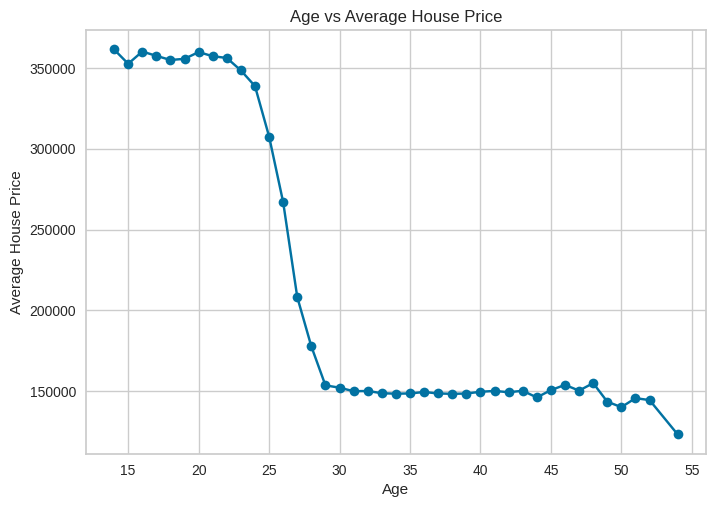

In [118]:
average_price_by_age = out_out.groupby('age')['house_price'].mean()
ages = average_price_by_age.index
avg_prices = average_price_by_age.values
plt.plot(ages, avg_prices, marker='o', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Average House Price')
plt.title('Age vs Average House Price')
plt.show()

## Probability and Statistics:

The goal of these questions is to test your ability to answer probability and stat questions with code.   
Use whatever libraries you are comfortable with.   
Code clarity and cleanliness are also highly valuable.   


### 1. What's the probability of a customer having 2 kids

In [119]:
filtered_df = out[out['n_kids'] == 2]
probability = len(filtered_df) / len(out)
print("Probability of a customer having 2 kids:", probability)

Probability of a customer having 2 kids: 0.10017142857142858


### 2. What's the probability of a customer owning more than 10 video games given that they have less than 2 kids

In [120]:
filtered_df = out[out['n_kids'] < 2]
customers_more_than_10_games = filtered_df[filtered_df['n_vg'] > 10]
count_more_than_10_games = len(customers_more_than_10_games)
count_less_than_2_kids = len(filtered_df)
probability = count_more_than_10_games / count_less_than_2_kids
print("Probability of a customer owning more than 10 video games given less than 2 kids:", probability)

Probability of a customer owning more than 10 video games given less than 2 kids: 0.4018363273453094


### 3. Plot the distribution of the number of hours played by customers `n_hours_playing`. Briefly explain what you understand now about the customers' playing hours.

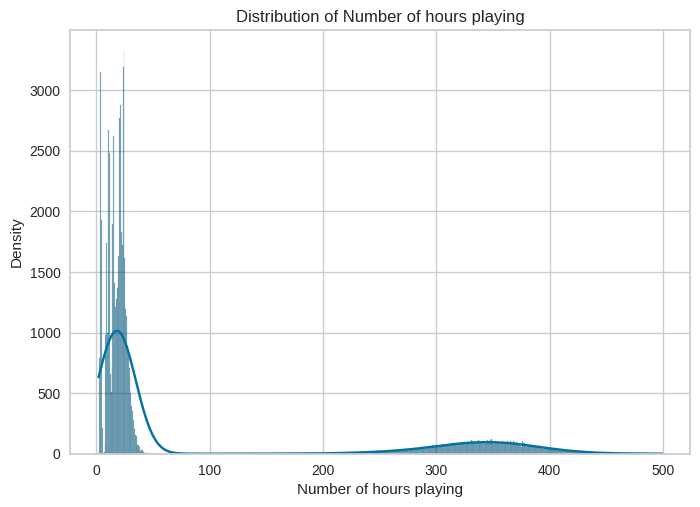

In [121]:
sns.histplot(out['n_hours_playing'], kde=True)
plt.xlabel('Number of hours playing')
plt.ylabel('Density')
plt.title('Distribution of Number of hours playing')
plt.show()

As you can see, most customers have a number of hours less than 50 so let's go ahead and remove any values less than 50.  
The distribution of the remaining values look like a normal distribution.  
###  4. Estimate the parameters (mean and std deviation) of this normal distribution computationally.  \
### (Bonus: plot the estimated normal distribution on top of the distribution of `n_hours_playing` after removing values < 50)

In [122]:
n_hours_playing_array = out['n_hours_playing'].to_numpy()
n_hours_playing_array = n_hours_playing_array[n_hours_playing_array >= 50]
n_hours_playing_array

array([299.1870251, 315.8049319, 396.5075161, ..., 356.4372106,
       364.1836438, 340.1980612])

In [123]:
array_mean= np.mean(n_hours_playing_array)
array_mean

338.54501334662666

In [124]:
array_std=np.std(n_hours_playing_array)
array_std

48.2925792379227

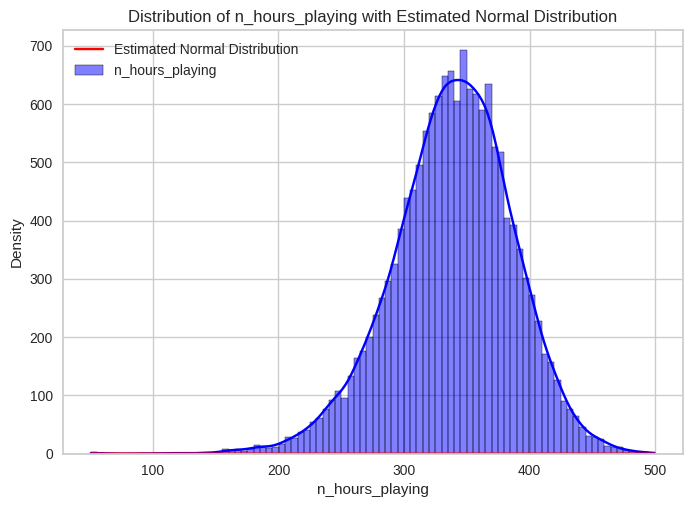

In [125]:
sns.histplot(n_hours_playing_array, kde=True, color='blue', label='n_hours_playing')
x = np.linspace(min(n_hours_playing_array), max(n_hours_playing_array), 100)
y = 1 / (array_std * np.sqrt(2 * np.pi)) * np.exp(-(x - array_mean) * 2 / (2 * array_std * 2))
plt.plot(x, y, color='red', label='Estimated Normal Distribution')
plt.xlabel('n_hours_playing')
plt.ylabel('Density')
plt.title('Distribution of n_hours_playing with Estimated Normal Distribution')
plt.legend()
plt.show()

# Modeling
The goal of this is to showcase your experimentation and model comparison process.  
The performance of models is not as important as how you compare them and evaluate them against each other.  

Use whatever libraries you are comfortable with.   
Code clarity and cleanliness are also highly valuable.   
# Apply Different regression model 
# Apply two classffier Model for the data of classfication ( as per your choice)

### 1. Model the number of hours played for each customer. Show your experimentation with failed and successful models.
### 2. Evaluate each experiment using appropriate metrics, cross validation, and plots. Show the predicted vs actual plot.
### 3. Choose the best model for the data

In [128]:
df_person_data.dropna(subset=['age'], inplace=True)
X = df_person_data.drop(['person_id','n_hours_playing'], axis=1)  
y = df_person_data['n_hours_playing']

In [129]:
from sklearn import preprocessing
x1 = X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x1)
df_scaled = pd.DataFrame(x_scaled)
df_scaled.head()

,0,1,2,3,4
0,0.00,0.0,0.000000,0.0,0.0
1,0.10,0.0,0.017544,0.0,0.0
2,0.35,0.0,0.026316,0.0,0.0
3,0.15,0.2,0.631579,0.0,0.0
4,0.45,0.2,0.508772,0.2,0.5


In [130]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef

X_train, X_test, y_train, y_test = train_test_split(df_scaled.values, y, test_size=0.2, random_state=42)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)

Mean Squared Error: 3408.743597930921
R2 Score: 0.8073126667092156


In [131]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 622.3426408772532
R2 Score: 0.9648206031287976


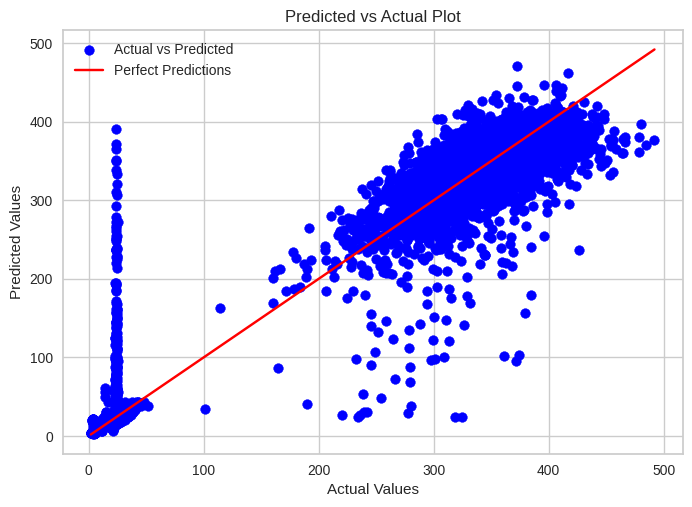

In [132]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Predictions')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Plot')

plt.legend()
plt.show()

In [133]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df=df_person_data.dropna()

df=df_person_data.drop(['person_id'],axis=1)
print(df_person_data)

X = df.drop('n_hours_playing', axis=1)  
y = df['n_hours_playing']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)

                                  person_id   age  n_kids  n_vg  n_con  \
0      50c4c7e2-89a6-440b-a8e3-c44aa2c6150e  14.0       0     0      0   
1      16f3bafb-9556-434e-adab-cb02f41fe32a  18.0       0     2      0   
2      0fa17eee-7214-4609-97fe-dd3093601800  28.0       0     3      0   
3      8db4ca66-dfb2-43f2-9c22-aa861dd0d218  20.0       1    72      0   
4      51fed64a-375e-417f-94e4-4d27c368ea44  32.0       1    58      1   
...                                     ...   ...     ...   ...    ...   
69995  8cbea1e2-3257-4db5-ae59-84faa48cfde2  32.0       4    62      1   
69996  e099ace5-a760-4362-a9ea-ae8cee590b86  36.0       0    53      1   
69997  e9b0604e-ec84-4704-8e75-eabfd59ac4fb  19.0       0     1      1   
69998  e20f8ec5-0ddf-4674-ac1f-d6280b6640ab  31.0       2    49      3   
69999  4d86ea85-2eaf-457a-bdba-73ff21830588  20.0       0     3      0   

       n_presub  n_hours_playing  
0             0        18.422745  
1             0        20.693273  
2     